## Importando Bibliotecas e Arquivo.

In [1]:
#Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as x
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import datetime as dt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import patsy as pt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# ---- Cronometrar o tempo do colab
import time

# ---- Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ---- Possíveis Modelos utilizados

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# ---- Cálculo das Métricas
from sklearn import metrics

import statsmodels.formula.api as smf
from random import randint

from sklearn.model_selection import GridSearchCV

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#Importando Dataset
# df1=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Amostra DNC titulo.csv')
# df1=df1.drop(df1.columns[0],axis=1)
# df2=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Azul_DNC_Abr22.csv')
# df=pd.concat([df1,df2])
# file = open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt')
df=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt',sep='\t')#,chunksize=1000,on_bad_lines='skip')
# df=pd.concat(chunck)

C:\Users\bruno\AppData\Local\Temp\ipykernel_19016\1276410854.py:7: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
# file = open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt')

# df = file.read()
# with open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt') as fileobject:
#     for line in fileobject:
#         do_something_with(line)

In [5]:
# df=[]
# with open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt') as fileobject:
#     for line in fileobject:
#         df.append(line)

In [6]:
# df

## Criando Variaveis

In [7]:
#Variavel Faixa horaria - hora cheia extraida do capo DepTime
df['faixa_horaria']=(df['DepTime'].astype('str')).str[:2].astype('int')

#Variavel Chave - Usada na construção de dataFrames auxiliares
# df['chave']= df['Segment']+df['FlightID']+(df['faixa_horaria'].astype('int')-1).astype('str')+(df['faixa_horaria'].astype('int')+1).astype('str')
df['chave2']=df['Dep Date']+df['Segment']+(df['faixa_horaria'].astype('int')).astype('str')

#Calculo dos indicadores RASK e Ocupação
df['Rask']=df['Revenue']/df['ASKs']
df['Ocupacao']=df['RPKs']/df['ASKs']

# #Calculo das Variaveis bookedday e revenueday, objetivo = mostrar o valor exato vendido em cada dia em receita e quantidade 
# df=df.sort_values(['FlightID','Dep Date','DepTime','NDO'],ascending=False)
# df['booked_day']=df['Booked'].diff()
# df['revenue_day']=df['Revenue'].diff()


### Ajuste das Variaveis categoricas e de datas

In [8]:
#Ajuste do nome das colunas, retirada de espaços
df=df.rename(columns={'Dep Date':'Dep_Date','Event Name':'Event_Name'})

#Ajustando Variaveis
df['Capture']= df['Capture'].astype('datetime64')
df['Dep_Date']= df['Dep_Date'].astype('datetime64')
# df['Month']= df['Month'].astype('datetime64')
# df['Week']= df['Week'].astype('datetime64')
df['Event_Name'] = df['Event_Name'].astype('category')
df['DOW'] = df['DOW'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Nest'] = df['Nest'].astype('category')
df['EquipmentType'] = df['EquipmentType'].astype('category')
df['NDSegment'] = df['NDSegment'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Orig'] = df['Orig'].astype('category')
df['Dest'] = df['Dest'].astype('category')
df['FlightID'] = df['FlightID'].astype('category')



### Criação de cópia do Data Frame para evitar alterações nos dados originais (Revisar a necessidade disto!)

In [10]:
# dforiginal1=df.copy()
dforiglimpo=df.drop(columns=['Capture','NDSegment','Orig','Dest','Distance','Month','Week','FlightID','EquipmentType'])

### Seleção de uma data de Captura / definição de amostra aleatória

In [92]:

dfTeste=df[df['Capture']=='2022-07-13']
dfTeste=pd.DataFrame(dfTeste).reset_index()
x=int((dfTeste.shape[0])*0.01)
dfTeste=dfTeste.sample(x,replace=True)
x

438

### Construção do Data Set para Teste de Modelos (1)

In [12]:
#seleção de numero aleatório da amostra para testes
# n=randint(1,x)
# n

In [13]:

# #Seleção de campos para filtro de dados para o Modelo preditivo     
# lin=dfTeste.iloc[n]
# a=lin['NDO']
# b=lin['Dep_Date']
# c=lin['Segment']
# d=lin['faixa_horaria'].astype('int')
# e=lin['Booked']
# f=lin['Flts']
# g=lin['chave2']

# #Seleção de Linha da Base / Definição de Variaveis para Filtros
# subdf1=dforiglimpo.loc[(dforiglimpo['NDO']==a) & (dforiglimpo['Dep_Date'].values<=b) & (dforiglimpo['Segment']==c) & (dforiglimpo['faixa_horaria']==d) ]

# #Filtro de linhas que tenham a mesma caracteristica da linha selecionada anteriormente, porem com NDO = Zero
# subdf2=dforiglimpo.loc[(dforiglimpo['NDO']==0) & (dforiglimpo['Dep_Date'].values<b) & (dforiglimpo['Segment']==c) & (dforiglimpo['faixa_horaria']==d) ]
# y=subdf2[['chave2','Ocupacao']]

# #Merge das informações / contrução da Base de Treino
# subdf3=pd.merge(subdf1,y,on='chave2')
# subdf3=subdf3.drop(columns=['Dep_Date','NDO','DepTime','Segment','Flts','faixa_horaria'])
# subdf3=subdf3.set_index('chave2')
    
#  #Merge das informações para contrução da Base de Teste     
# subdf3b=pd.merge(subdf1,y,how = 'left',on='chave2')
# subdf3b=subdf3b.drop(columns=['Dep_Date','NDO','DepTime','Segment','Flts','faixa_horaria'])
# subdf3b=subdf3b.set_index('chave2')

# #Transformação de variaveis categoricas em numericas
# lab = LabelEncoder()
# subdf3['Event_Name']=lab.fit_transform(subdf3['Event_Name'])
# subdf3['EvDef']=lab.fit_transform(subdf3['EvDef'])
# subdf3['DOW']=lab.fit_transform(subdf3['DOW'])
# subdf3['Description']=lab.fit_transform(subdf3['Description'])
# subdf3['Nest']=lab.fit_transform(subdf3['Nest'])

# #Definição de x e y para o modelo
# y= np.array(subdf3['Ocupacao_y'])
# x=subdf3.drop('Ocupacao_y', axis = 1)  
# x_list = list(x.columns)
# x = np.array(x)

In [14]:
# #Função OLS para Verificação de significancia estatistica das Variaveis selecionadas
# function = 'Ocupacao_y~Event_Name+EvDef+DOW+Description+Nest+Lid+Booked+NSKBooked+GDSBooked+TudoAzulBooked+AzulViagensBooked+CNXBooked+Revenue+RevenueNSK+RevenueGDS+RevenueTudoAzul+RevenueAzulViagens+DLRev+ Rask+Ocupacao_x+ASKs+RPKs-1'
# model = smf.ols(formula=function, data=subdf3).fit() 
# print(model.summary())

#'Ocupacao_y~Event_Name+EvDef+DOW+Description+Nest+Lid+Booked+NSKBooked+GDSBooked+TudoAzulBooked+AzulViagensBooked+CNXBooked+Revenue+RevenueNSK+RevenueGDS+RevenueTudoAzul+RevenueAzulViagens+DLRev+ Rask+Ocupacao_x+ASKs+RPKs-1'

In [15]:
# #Teste de Modelos (1)

# models = {
#     'LinearReg': LinearRegression(),
#     'RidgeReg': Ridge(),
#     'LassoReg': Lasso(),
#     'ElasticNetReg': ElasticNet(),
#     'HuberReg': HuberRegressor(),
#     'LassoCV': LassoCV(),
#     'ElasticNetCV': ElasticNetCV(),
#     'LassoLars': LassoLars(),
#     'BayesianRidge': BayesianRidge(),
#     'DecisionTreeRegressor': DecisionTreeRegressor(),
#     'SVM_RBF':SVR(kernel='rbf'),
#     'SVM_POLY':SVR(kernel='poly'),
#     'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
#     'SVM_SIG':SVR(kernel='sigmoid'),
#     'SGDRegressor':SGDRegressor(),
#     'RandomForestRegressor':RandomForestRegressor(),
#     'AdaBoostRegressor':AdaBoostRegressor(),
#     'GradientBoostingRegressor':GradientBoostingRegressor(),
#     'ExtraTreesRegressor':ExtraTreesRegressor()
# }

# for model in models.values():
#     model.fit(x, y);

# eval = []
# nome = []
# r2 = []
# MAE = []
# for name, model in models.items():
#     y_pred = model.predict(x)
#     nome.append(name)
#     eval.append(metrics.mean_squared_error(y,y_pred))
#     r2.append(metrics.r2_score(y,y_pred))
#     MAE.append(metrics.mean_absolute_error(y,y_pred))
#     print('-------------------------')
#     print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y,y_pred),metrics.mean_squared_error(y,y_pred),metrics.mean_absolute_error(y,y_pred)))
#     print('-------------------------')

In [16]:
# #Teste de Modelos (1)

# teste = pd.DataFrame({'Modelo': nome, 'MSE': eval, 'R2': r2, 'MAE':MAE})
# teste.nsmallest(18,['MAE'])

### Construção do Data Set para Teste de Modelos (2)

In [17]:
# #Seleção de Linha da Base / Definição de Variaveis para Filtros     
# lin=dfTeste.iloc[1]
# a=lin['NDO']
# b=lin['Dep_Date']
# c=lin['Segment']
# d=lin['faixa_horaria']
# e=lin['Booked']
# f=lin['Flts']
# g=lin['chave2']

# #Filtro de linhas que estejam na mesma caracteristica da linha selecionada anteriormente
# subdf1=dforiglimpo.loc[(dforiglimpo['NDO']==a) & (dforiglimpo['Dep_Date'].values<=b) & (dforiglimpo['Segment']==c) & (dforiglimpo['faixa_horaria']==d)]

# #Filtro de linhas que tenham a mesma caracteristica da linha selecionada anteriormente, porem com NDO = Zero
# subdf2=dforiglimpo.loc[(dforiglimpo['NDO']==0) & (dforiglimpo['Dep_Date'].values<b) & (dforiglimpo['Segment']==c) & (dforiglimpo['faixa_horaria']==d)]
# y=subdf2[['chave2','Ocupacao']]

# #Merge das informações / contrução da Base de Treino
# subdf3=pd.merge(subdf1,y,on='chave2')
# subdf3=subdf3[['chave2','Nest','Revenue','Event_Name','EvDef','DOW','Lid','Ocupacao_x','Ocupacao_y','Description']]
# subdf3=subdf3.set_index('chave2')
    
# #Merge das informações para contrução da Base de Teste    
# subdf3b=pd.merge(subdf1,y,how = 'left',on='chave2')
# subdf3b=subdf3b[['chave2','Nest','Revenue','Event_Name','EvDef','DOW','Lid','Ocupacao_x','Ocupacao_y','Description']]
# subdf3b=subdf3b.set_index('chave2')

# #Transformação de variaveis categoricas em numericas
# lab = LabelEncoder()
# subdf3['Event_Name']=lab.fit_transform(subdf3['Event_Name'])
# subdf3['EvDef']=lab.fit_transform(subdf3['EvDef'])
# subdf3['DOW']=lab.fit_transform(subdf3['DOW'])
# subdf3['Description']=lab.fit_transform(subdf3['Description'])
# subdf3['Nest']=lab.fit_transform(subdf3['Nest'])


# #Definição de x e y para o modelo
# y2= np.array(subdf3['Ocupacao_y'])

# x2=subdf3.drop('Ocupacao_y', axis = 1)       

# x_list2 = list(x2.columns)

# x2 = np.array(x2)


RevenueNSK+RevenueGDS+RevenueTudoAzul+RevenueAzulViagens+DLRev+ 
Ocupacao+Booked+Nest+NSKBooked+CNXBooked+GDSBooked+TudoAzulBooked+AzulViagensBooked+Description+
+ASKs+RPKs

In [ ]:
# #Função OLS para Verificação de significancia estatistica das Variaveis selecionadas

# function = 'Ocupacao_y~Nest+Revenue+Event_Name+EvDef+DOW+Lid+Ocupacao_x+Description-1'
# model = smf.ols(formula=function, data=subdf3).fit() 
# print(model.summary())

In [19]:
# #Teste de Modelos (2)

# models = {
#     'LinearReg': LinearRegression(),
#     'RidgeReg': Ridge(),
#     'LassoReg': Lasso(),
#     'ElasticNetReg': ElasticNet(),
#     'HuberReg': HuberRegressor(),
#     'LassoCV': LassoCV(),
#     'ElasticNetCV': ElasticNetCV(),
#     'LassoLars': LassoLars(),
#     'BayesianRidge': BayesianRidge(),
#     'DecisionTreeRegressor': DecisionTreeRegressor(),
#     'SVM_RBF':SVR(kernel='rbf'),
#     'SVM_POLY':SVR(kernel='poly'),
#     'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
#     'SVM_SIG':SVR(kernel='sigmoid'),
#     'SGDRegressor':SGDRegressor(),
#     'RandomForestRegressor':RandomForestRegressor(),
#     'AdaBoostRegressor':AdaBoostRegressor(),
#     'GradientBoostingRegressor':GradientBoostingRegressor(),
#     'ExtraTreesRegressor':ExtraTreesRegressor()
# }

# for model in models.values():
#     model.fit(x2, y2);

# eval = []
# nome = []
# r2 = []
# MAE = []
# for name, model in models.items():
#     y_pred = model.predict(x2)
#     nome.append(name)
#     eval.append(metrics.mean_squared_error(y2,y_pred))
#     r2.append(metrics.r2_score(y2,y_pred))
#     MAE.append(metrics.mean_absolute_error(y2,y_pred))
#     print('-------------------------')
#     print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y2,y_pred),metrics.mean_squared_error(y2,y_pred),metrics.mean_absolute_error(y2,y_pred)))
#     print('-------------------------')

In [20]:
# #Teste de Modelos (2)

# teste = pd.DataFrame({'Modelo2': nome, 'MSE': eval, 'R2': r2, 'MAE':MAE})
# teste.nsmallest(18,['MAE'])

# Aplicação de Modelos

In [22]:
##Redefiniçao do data set de acordo com o data set de teste 2
dforiginal2=df.copy()
dforiglimpo2=dforiginal2.drop(columns=['Capture','NDSegment','Orig','Distance','Month','Week','FlightID','EquipmentType','ASKs', 'RPKs', 'Booked', 'NSKBooked', 'GDSBooked', 'TudoAzulBooked',
       'AzulViagensBooked', 'CNXBooked', 'Revenue', 'RevenueNSK', 'RevenueGDS','Dest',
       'RevenueTudoAzul', 'RevenueAzulViagens', 'DLRev'])
# Rask_y~Nest+Revenue+Event_Name+EvDef+DOW+Lid+Rask_x+Description,'Dest',

In [148]:
#Variavel Vazia para receber o resultado da Predição
base=[]

#for para percorrer todas as linhas da base selecionada / Definição de Variaveis para Filtros
for i in range(20):
     
     lin=dfTeste.iloc[i]
     a=lin['NDO']
     b=lin['Dep_Date']
     c=lin['Segment']
     d=lin['faixa_horaria']
     e=lin['Ocupacao']
     f=lin['Flts']
     g=lin['chave2']
     h=lin['Nest']

     #Filtro de linhas que estejam na mesma caracteristica da linha selecionada anteriormente
     subdf1=dforiglimpo2.loc[(dforiglimpo2['NDO']==a) & (dforiglimpo2['Dep_Date'].values<=b) & (dforiglimpo2['Segment']==c) & (dforiglimpo2['faixa_horaria']==d)&(dforiglimpo2['Nest']==h)]

     #Filtro de linhas que tenham a mesma caracteristica da linha selecionada anteriormente, porem com NDO = Zero
     subdf2=dforiglimpo2.loc[(dforiglimpo2['NDO']==-1) & (dforiglimpo2['Dep_Date'].values<b) & (dforiglimpo2['Segment']==c) & (dforiglimpo2['faixa_horaria']==d)&(dforiglimpo2['Nest']==h)]
     y=subdf2[['chave2','Ocupacao']]

     #Merge das informações / contrução da Base de Treino
     subdf3=pd.merge(subdf1,y,on='chave2')
     subdf3=subdf3.drop(columns=['Dep_Date','NDO','DepTime','Segment','Flts','faixa_horaria'])
     subdf3=subdf3.set_index('chave2')

     #Merge das informações para contrução da Base de Teste
     subdf3b=pd.merge(subdf1,y,how = 'left',on='chave2')     
     subdf3b=subdf3b.drop(columns=['Dep_Date','NDO','DepTime','Segment','Flts','faixa_horaria'])     
     subdf3b=subdf3b.set_index('chave2')

     i=len(subdf3b)

     #Transformação de variaveis categoricas em numericas Base treino
     lab = LabelEncoder()
     subdf3['Event_Name']=lab.fit_transform(subdf3['Event_Name'])
     subdf3['EvDef']=lab.fit_transform(subdf3['EvDef'])
     subdf3['DOW']=lab.fit_transform(subdf3['DOW'])
     subdf3['Description']=lab.fit_transform(subdf3['Description'])
     subdf3['Nest']=lab.fit_transform(subdf3['Nest'])

     #Transformação de variaveis categoricas em numericas Base teste
     subdf3b['Event_Name']=lab.fit_transform(subdf3b['Event_Name'])
     subdf3b['EvDef']=lab.fit_transform(subdf3b['EvDef'])
     subdf3b['DOW']=lab.fit_transform(subdf3b['DOW'])
     subdf3b['Description']=lab.fit_transform(subdf3b['Description'])
     subdf3b['Nest']=lab.fit_transform(subdf3b['Nest'])

     #Exclusão da Variavel Resposta do base de Teste
     subdf3b=subdf3b.drop(columns=['Ocupacao_y'])
     
     #Definição de x e y para o modelo
     y= np.array(subdf3['Ocupacao_y'])

     x=subdf3.drop('Ocupacao_y', axis = 1)   

     x_list = list(x.columns)
     x = np.array(x)

     try:
### Teste para capturar os melhores parametros
     #      gbr2=DecisionTreeRegressor()

     #      parameters={"splitter":["best","random"],
     #        "max_depth" : [1,3,5,7,9,11,12],
     #       "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
     #       "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
     #       "max_features":["auto","log2","sqrt",None],
     #       "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
           
     #      grid_search = GridSearchCV(gbr2, parameters, scoring='r2', cv=2, n_jobs=-1)

     #      grid_search.fit(x, y)
     #      best_model = grid_search.best_estimator_
     #      params = best_model.get_params()

     #      ccp_alphax=params['ccp_alpha']
     #      criterionx=params['criterion']
     #      max_depthx=params['max_depth']
     #      max_featuresx=params['max_features']
     #      max_leaf_nodesx=params['max_leaf_nodes']
     #      min_impurity_decreasex=params['min_impurity_decrease']
     #      min_samples_leafx=params['min_samples_leaf']
     #      min_samples_splitx=params['min_samples_split']
     #      min_weight_fraction_leafx=params['min_weight_fraction_leaf']
     #      random_statex=params['random_state']
     #      splitterx=params['splitter']
    
     # ####Definição da variavel para algoritmo de Predição escolhido
     #      grb = DecisionTreeRegressor(
     #      ccp_alpha=ccp_alphax,
     #      criterion=criterionx,
     #      max_depth=max_depthx,
     #      max_features=max_featuresx,
     #      max_leaf_nodes=max_leaf_nodesx,
     #      min_impurity_decrease=min_impurity_decreasex,
     #      min_samples_leaf=min_samples_leafx,
     #      min_samples_split=min_samples_splitx,
     #      min_weight_fraction_leaf=min_weight_fraction_leafx,
     #      random_state=random_statex,
     #      splitter=splitterx)


          # grb = GradientBoostingRegressor(alpha= 0.9,
          # ccp_alpha= 0.0,
          # criterion= 'friedman_mse',
          # init= None,
          # learning_rate= 0.03,
          # loss='squared_error',
          # max_depth= 8,
          # max_features= None,
          # max_leaf_nodes= None,
          # min_impurity_decrease= 0.0,
          # min_samples_leaf= 1,
          # min_samples_split= 2,
          # min_weight_fraction_leaf= 0.0,
          # n_estimators= 100,
          # n_iter_no_change= None,
          # random_state= None,
          # subsample= 0.2,
          # tol= 0.0001,
          # validation_fraction= 0.1,
          # verbose= 0,
          # warm_start= False)

          grb =DecisionTreeRegressor()
     #Aplicação do Modelo / preenchimento da variavel de resultados com os dados selecionados, valor predito e metricas do modelo / tratativa de erros
     
          grb.fit(x, y)
          grb_pred = grb.predict(subdf3b)
          z= grb.predict(x)
          r2 = grb.score(x, y)
          MAE= metrics.mean_absolute_error(y, z)
          MSE= metrics.mean_squared_error(y, z)
          RMSE=np.sqrt(metrics.mean_squared_error(y, z))     
          base.append([g,b,c,d,e,h,a,grb_pred[0],r2,MAE,MSE,RMSE,i])

     except:
          base.append([g,b,c,d,e,h,a,0,0,0,0,0,0])

     warnings.simplefilter("ignore")


In [149]:
#Construção de Base para Avaliação do Modelo

teste=dforiglimpo2[dforiglimpo2['NDO']==-1]
teste=teste[['chave2','Ocupacao']]
base2=pd.DataFrame(base)
base2=base2.rename(columns={0:'chave2',1:'Dep_Date',2:'Segment',3:'faixa_horaria',4:'Ocupacao',5:'Nest',6:'NDO',7:'Predict',8:'r2',9:'MAE',10:'MSE',11:'RMSE',12:'total_hist'})

base2=pd.merge(base2,teste,on='chave2')
erros2=len(base2[base2['Predict']==0])
erros=len(base2[base2['Predict']==0])/len(base2)
# base2=base2[base2['Predict']>0]
# base2=base2[base2['Ocupacao_y']>0]
base2['Ocupacao_x']=base2['Ocupacao_x']*100
base2['Predict']=base2['Predict']*100
base2['MAE']=base2['MAE']*100
base2['MSE']=base2['MSE']*100
base2['RMSE']=base2['RMSE']*100
base2['Ocupacao_y']=base2['Ocupacao_y']*100
# base2['Assertividade'] = ((base2['Predict']/base2['Ocupacao_y'])*100)-100
base2['Assertividade'] = (base2['Predict']-base2['Ocupacao_y'])
# base2['Acuracia'] = base2['Predict']/base2['Rask_y']
base2.head(30)

,chave2,Dep_Date,Segment,faixa_horaria,Ocupacao_x,Nest,NDO,Predict,r2,MAE,MSE,RMSE,total_hist,Ocupacao_y,Assertividade
0,2022-08-26ZIFEXK5,2022-08-26,ZIFEXK,5,44.285714,Y,44,85.714286,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,122,95.833333,-10.119048
1,2022-08-02IVXZQF8,2022-08-02,IVXZQF,8,45.714286,Y,20,75.714286,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,117,68.571429,7.142857
2,2022-07-25RKMXMU19,2022-07-25,RKMXMU,19,52.857143,Y,12,88.571429,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,111,67.142857,21.428571
3,2022-07-18EXKQWL22,2022-07-18,EXKQWL,22,69.852941,Y,5,86.029412,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,97,80.508475,5.520937
4,2022-08-11NZLIVX2,2022-08-11,NZLIVX,2,55.607477,Y,29,87.356322,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,125,98.598131,-11.241809
5,2022-08-12XDYOWY13,2022-08-12,XDYOWY,13,21.428571,Y,30,38.571429,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,39,61.428571,-22.857143
6,2022-07-16EXKHHZ8,2022-07-16,EXKHHZ,8,101.470588,Y,3,93.382353,1.000000,3.142141e-16,3.488477e-32,1.867746e-15,107,100.000000,-6.617647
7,2022-07-29OWYEXK11,2022-07-29,OWYEXK,11,80.000000,Y,16,90.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,111,97.058824,-7.058824
8,2022-08-17MEGEXK11,2022-08-17,MEGEXK,11,40.677966,Y,35,80.508475,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,101,61.864407,18.644068
9,2022-08-20KLZYTC10,2022-08-20,KLZYTC,10,0.000000,Y,38,57.142857,0.788073,5.921856e+00,1.364905e+00,1.168291e+01,96,42.857143,14.285714


In [150]:

prev=base2['Predict'].sum()
real=base2['Ocupacao_y'].sum()
Assertividade=((prev/real)*100)
Assertividade1= base2.loc[(base2['Assertividade']>=-10) &(base2['Assertividade']<=10)] 
Assertividade2=len(Assertividade1)/len(base2)
print('% de erros de execução', erros*100)
print('Valor total previsto - ',prev)
print( 'Valor Total treal - ', real)
print('% Geral de Assertividade - ', Assertividade)
print( '% de linhas com erro de até 10% - ', Assertividade2*100) 
print(len(base2))
print(erros2)


% de erros de execução 0.0
Valor total previsto -  1675.7818892925907
Valor Total treal -  1653.5391547725553
% Geral de Assertividade -  101.34515922745686
% de linhas com erro de até 10% -  33.33333333333333
21
0


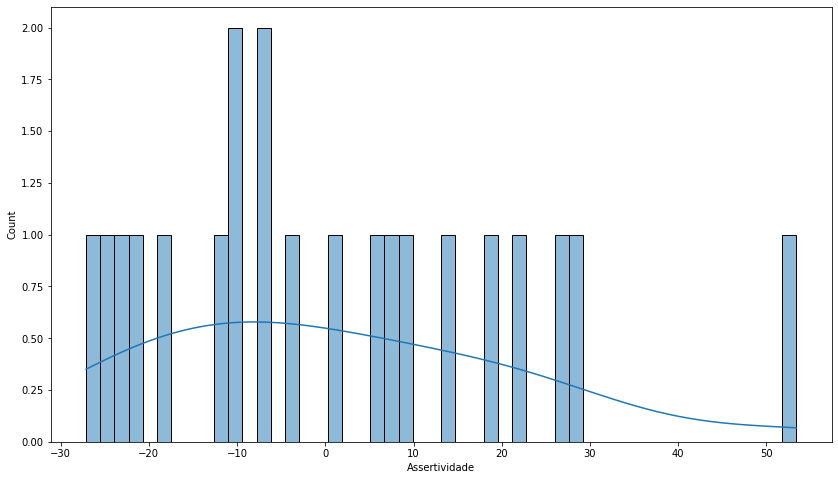

In [151]:
fig=plt.figure(figsize=[14,8])
sns.histplot(base2['Assertividade'],bins=50,kde=True)
plt.show()

<AxesSubplot:xlabel='total_hist', ylabel='Count'>

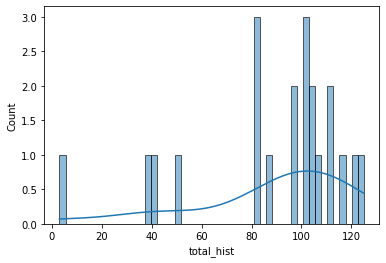

In [152]:
sns.histplot(base2['total_hist'],bins=50,kde=True)

In [153]:
# base2.to_excel('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/base2.xlsx')

# Teste para Selecionar os melhores iperparametros

In [154]:


# grb2=DecisionTreeRegressor()
# # parameters = {'learning_rate': [0.03],
# #                   'subsample'    : [0.2],
# #                   'n_estimators' : [100,500,1000, 1500],
# #                   'max_depth'    : [8]
# #                  }
# parameters={"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
           
# grid_search = GridSearchCV(grb2, parameters, scoring='r2', cv=2, n_jobs=-1)



In [155]:
# grid_search.fit(x, y)


In [156]:
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_search.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

In [157]:
# best_model = grid_search.best_estimator_

In [158]:
# best_model.get_params()

In [159]:


# dforiglimpox=dforiginal1

In [160]:
# #Seleção de Linha da Base / Definição de Variaveis para Filtros     
# lin=dfTeste.iloc[5]
# a=lin['NDO']
# b=lin['Dep_Date']
# c=lin['Segment']
# d=lin['faixa_horaria']
# e=lin['Booked']
# f=lin['Flts']
# g=lin['chave2']
# h=lin['Nest']

# #Filtro de linhas que estejam na mesma caracteristica da linha selecionada anteriormente
# subdf1=dforiglimpox.loc[(dforiglimpox['NDO']==a) & (dforiglimpox['Dep_Date'].values<=b) & (dforiglimpox['Segment']==c) & (dforiglimpox['faixa_horaria']==d)&(dforiglimpo['Nest']==h)]

# #Filtro de linhas que tenham a mesma caracteristica da linha selecionada anteriormente, porem com NDO = Zero
# subdf2=df.loc[(dforiglimpox['NDO']==0) & (dforiglimpox['Dep_Date'].values<b) & (dforiglimpox['Segment']==c) & (dforiglimpox['faixa_horaria']==d)&(dforiglimpo['Nest']==h)]
# y=subdf2[['chave2','Rask']]

# #Merge das informações / contrução da Base de Treino
# subdf3=pd.merge(subdf1,y,how = 'left',on='chave2')

# subdf3=subdf3.set_index('chave2')
# subdf3
# subdf3.to_excel('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Revisao2.xlsx')

In [161]:
lin=dfTeste.iloc[2]
a=lin['NDO']
b=lin['Dep_Date']
c=lin['Segment']
d=lin['faixa_horaria']
e=lin['Booked']
f=lin['Flts']
g=lin['chave2']

validacao_falhas=df.loc[(df['Segment']==c) & (df['Dep_Date'].values==b) & (dforiglimpo['faixa_horaria']==d or dforiglimpo['faixa_horaria']==d-1)]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# dfTeste.iloc[:20].to_excel('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Revisao3.xlsx')